In [28]:
# Dependencies and Setup

from sqlalchemy import create_engine

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np


In [13]:
import psycopg2
# Create engine and pass in postgres connection
conn_string = "host=127.0.0.1 port=5432 dbname=Employee_Dbase user=postgres password=postgres"
conn = psycopg2.connect(conn_string)

In [14]:
conn

<connection object at 0x000001D5590D4488; dsn: 'user=postgres password=xxx dbname=Employee_Dbase host=127.0.0.1 port=5432', closed: 0>

In [29]:
# Query all records in the salaries table
salaries_df = pd.read_sql('select * from salaries', conn)
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [30]:
# Query all records in the titles table
titles_df = pd.read_sql('select * from titles', conn)
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [31]:
# Merge the columns
combined_df = pd.merge(salaries_df, titles_df, on="emp_no", how="inner")
combined_df.head()


,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [34]:
# Group by title
grouped_df = combined_df.groupby("title").mean()
grouped_df.head()

,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614


In [51]:
# Drop 'emp_no' column to show only title & salary
salary_title_df = grouped_df.drop(columns='emp_no')
salary_title_df.head()

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614


In [52]:
# Reset index
salary_title_df = salary_title_df.reset_index()
salary_title_df.head()


,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


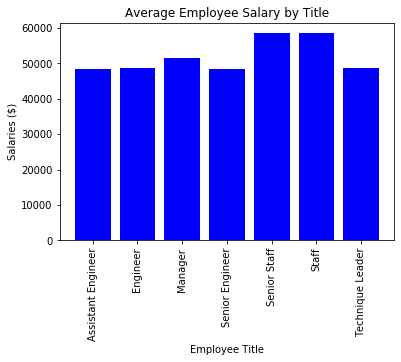

In [63]:
# Create bar chart for Average Employee Salary by Title
x_axis = salary_title_df["title"]
ticks = np.arange(len(x_axis))
y_axis = salary_title_df["salary"]
plt.bar(x_axis, y_axis, align="center", alpha=1.0, color="b")

plt.xticks(ticks, x_axis, rotation="vertical")

plt.xlabel("Employee Title")
plt.ylabel("Salaries ($)")
plt.title("Average Employee Salary by Title")

# Save Figure
plt.savefig("salary_by_title.png")


plt.show()

